# Test the MOEA

Author: Michele Urbani ([murbani@fbk.eu](mailto:murbani@fbk.eu))

Date: September 5th, 2024

Test a basic version of the MOEA and plot the Pareto frontier.

In [3]:
# Add moea to the path
import sys
sys.path.append('..')

from moea.models import get_model
from moea.algorithms import get_algorithm

from pymoo.optimize import minimize

In [4]:
# Define the model and algorithm
problem = get_model('aalborga')
algorithm = get_algorithm('base_algorithm', pop_size=25)

In [ ]:
# Run the optimization
res = minimize(
    problem,
    algorithm,
    ('n_gen', 20),
    seed=123,
    verbose=True
)

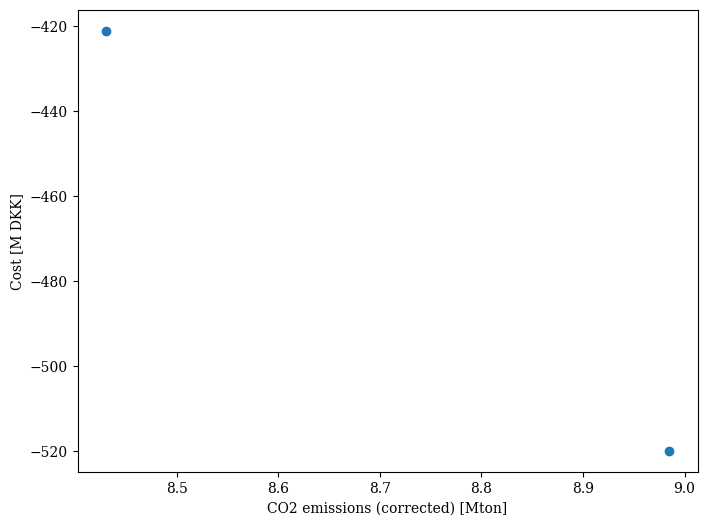

In [4]:
from pymoo.visualization.scatter import Scatter

F = res.F
plot = Scatter(labels=['CO2 emissions (corrected) [Mton]', 'Cost [M DKK]']).add(F)
plot.show()

## Test the MOEA on the 4-objecitves case of the Giudicarie Esteriori

In [4]:
import pickle
import pandas as pd
import plotly.express as px

In [12]:
res_path = '../results_giudicarie_BaseAlgorithm.pkl'

with open(res_path, 'rb') as f:
    results = pickle.load(f)

# Extract the frontier
F = results.F
# Cast results to DataFrame
df = pd.DataFrame(
    F,
    columns=[
        'CO2 emissions (corrected) [Mton]',
        'Cost [kEUR]',
        'LFC',
        'ESD'
    ]
) 
# Define plot
fig = px.scatter_3d(
    df,
    x='CO2 emissions (corrected) [Mton]',
    y='Cost [kEUR]',
    z='LFC',
    color='ESD',
    height=800
)
# Show plot
fig.show()
